In [89]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
# Lendo a base de dados
base = pd.read_csv(r'exames-tratado-3.csv')
base = base.drop('Unnamed: 0', axis = 1)

In [91]:
base.head()

,id,diagnostico,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,842302,M,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
# Dividindo inputs e outputs
x = base.loc[:, 'exame_2':]
y = base['diagnostico']

In [93]:
x.columns

Index(['exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9',
       'exame_10', 'exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [94]:
# Selecionando as k variáveis através de um teste F

k_best_selector = SelectKBest(f_classif, k = 5)

k_best_selector.fit(x,y)

SelectKBest(k=5)

In [95]:
# Verificando quais as 10 melhores características:
k_best_selector.get_feature_names_out()

array(['exame_5', 'exame_8', 'exame_9', 'exame_25', 'exame_30'],
      dtype=object)

In [96]:
# Verificando os p-valores para cada característica:
pd.DataFrame(dict(zip(k_best_selector.feature_names_in_, k_best_selector.pvalues_)), index=[0])

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,4.058636e-25,4.734564e-88,1.051850e-18,3.938263e-56,9.966556e-84,7.101150e-116,5.733384e-16,0.759937,9.738949e-50,0.843332,...,0.876642,0.063074,1.078057e-30,2.828848e-97,6.575144e-26,7.069816e-55,2.464664e-72,1.969100e-124,2.951121e-25,2.316432e-15


In [97]:
# Verificando os scores para cada característica:
pd.DataFrame(dict(zip(k_best_selector.feature_names_in_, k_best_selector.scores_)), index=[0])

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,118.096059,573.060747,83.651123,313.233079,533.793126,861.67602,69.527444,0.093459,268.840327,0.039095,...,0.024117,3.468275,149.596905,661.600206,122.47288,304.341063,436.691939,964.385393,118.860232,66.443961


In [98]:
# Definindo função para testar o modelo

def testa_modelo(base, caracteristicas_excluidas=[]):

    # Definindo inputs e outputs
    x2 = base.drop(['id', 'diagnostico'] + caracteristicas_excluidas, axis = 1).values
    y2 = base['diagnostico'].values.ravel()

    # Definindo a random seed
    SEED = 30

    # Definindo a random seed do numpy
    np.random.seed(SEED)

    # Dividindo os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3)

    # Instanciando e treinando o modelo a ser treinado
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(x_train, y_train)
    previsao = rfc.predict(x_test)

    # Transformando B em 0 e M em 1
    dict_transform = {
        'B': 0,
        'M': 1
    }

    previsao_transform = [dict_transform[diagnostico] for diagnostico in previsao]
    y_test_transform = [dict_transform[diagnostico] for diagnostico in y_test]

    # Calculando as métricas para esse modelo:
    acuracia = accuracy_score(y_test_transform, previsao_transform)*100
    precisao = precision_score(y_test_transform, previsao_transform)*100
    recall = recall_score(y_test_transform, previsao_transform)*100
    matriz_confusao = confusion_matrix(y_test_transform, previsao_transform)

    print(f'Acurácia: {acuracia:.2f}%')
    print(f'Precisão: {precisao:.2f}%')
    print(f'Recall: {recall:.2f}%')

    sns.heatmap(matriz_confusao, annot = True, fmt='d').set(xlabel = 'Predição', ylabel = 'Real')
    plt.show()

Acurácia: 94.74%
Precisão: 93.44%
Recall: 91.94%


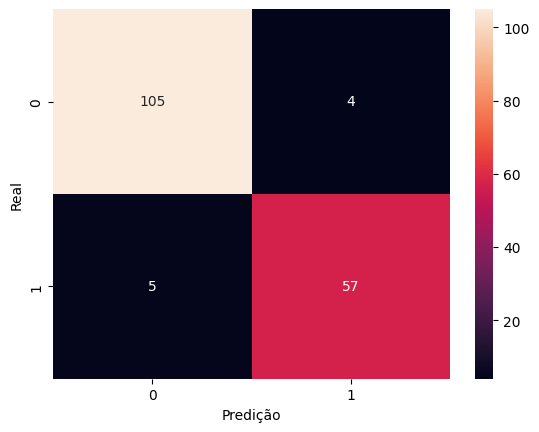

In [99]:
# Criando um modelo apenas com as características selecionadas pelo k_best_selector:
caracteristicas = list(k_best_selector.get_feature_names_out())

testa_modelo(base, caracteristicas)

Acurácia: 95.91%
Precisão: 96.61%
Recall: 91.94%


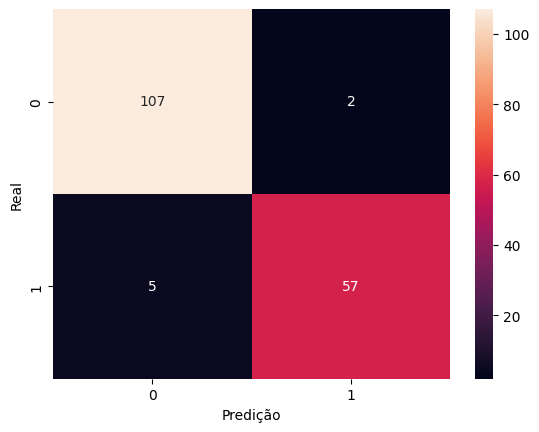

In [100]:
# Testando o modelo sem excluir nenhuma característa:
testa_modelo(base)

In [101]:
# É possível também utilizar o RFE para selecionar as melhores características do modelo

Apesar de existir uma redução no score de acurácia e precisão do modelo, não houve alteração no score de recall - ou seja, o modelo continuou identificando a mesma proporção de casos malignos do total de casos maligons. Com essa é a métrica mais importante para o modelo em questão, é possível utilizar o modelo apenas com essas 5 características.

In [102]:
base.drop(caracteristicas, axis = 1).to_csv(r'exames-tratado-4.csv')